<a href="https://colab.research.google.com/github/alekriley/alekriley.github.io/blob/master/importance_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sne
%matplotlib inline
sne.set_style('dark')

# Importance Sampling to estimate probability of extreme events

## Interesting looking distribution

We wil be using the following pdf $p(x)=\int_{a,b}p(x|a,b)p(a)p(b)$ where $p(x|a,b)$ is a truncated normal distribution with support $x\in\{a,b\}$ and $p(a)$ and $p(b)$ are half normal distributions with support ${a\in\{-\infty,0}\}$ and $b\in\{0,\infty\}$ respectively.

Then the pdf $p(x)$ has the following form:
> $$p(x) = \frac{1}{Z}\left(\frac{\phi(x)}{\Phi(b)-\Phi(a)}\right)\left(\frac{\phi(b)[b>0]}{1-\Phi(0)}\right)\left(\frac{\phi(a)[a<0]}{\Phi(0)}\right)$$


Lets draw some samples from the joint distribution.

In [0]:
import scipy.stats as sts


def sample_as_and_bs(n_samples):
  a = -sts.halfnorm().rvs(n_samples)
  b = sts.halfnorm().rvs(n_samples)
  
  return zip(a,b)

def exhaustive_search(bounds,n_samples,n_abs):
  x_s = np.linspace(*bounds,n_samples)
  pdfs = np.zeros(x_s.shape)
  as_and_bs = list(sample_as_and_bs(n_abs))
  for i,x in enumerate(x_s):
    for a,b in as_and_bs:
      pdfs[i]+=sts.truncnorm.pdf(x,a=a,b=b)*sts.halfnorm.pdf(-a)*sts.halfnorm.pdf(b)
    pdfs[i]/=n_abs
  return x_s,pdfs

exhaustive_xs,exhaustive_pdfs = exhaustive_search((-3,3),n_samples,n_samples)


## What do the densities look like

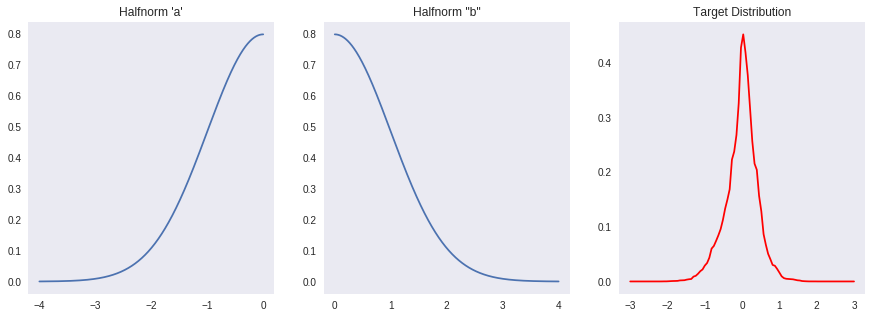

In [112]:
fig = plt.figure(figsize=(15,5))
gs = plt.GridSpec(1,3)
axs = [plt.subplot(g) for g in gs]
axs[0].set_title("Halfnorm 'a'")
axs[0].plot(np.linspace(-4,0,1000),sts.halfnorm.pdf(-np.linspace(-4,0,1000)))
axs[1].set_title('Halfnorm "b"')
axs[1].plot(np.linspace(0,4,1000),sts.halfnorm.pdf(np.linspace(0,4,1000)))
axs[2].set_title('Target Distribution')
axs[2].plot(exhaustive_xs,exhaustive_pdfs,c='red')
plt.show()

## Rare Event Estimation


In [118]:
def get_interval_estimate(normalized_ps,samples,n_samples,n_interval_samples,interval):
  #sample from distribution
  interval_samples = [np.sort(np.random.choice(samples,n_samples,p=normalized_ps))[n_samples*interval//100] for _ in range(n_interval_samples)]
  return np.mean(interval_samples),np.std(interval_samples)

#normalize our exhaustive distribution we know they are ordered
normalized = exhaustive_pdfs/np.sum(exhaustive_pdfs)
get_interval_estimate(normalized,exhaustive_xs,100,100,95)


(0.6430303030303033, 0.11463841025416169)

In [0]:
def sample 